In [2]:
import numpy as np
import os, shutil
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.utils import PyDataset
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Input
from keras.optimizers import RMSprop
from scipy.signal import convolve2d
from tensorflow.keras.preprocessing.image import ImageDataGenerator

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


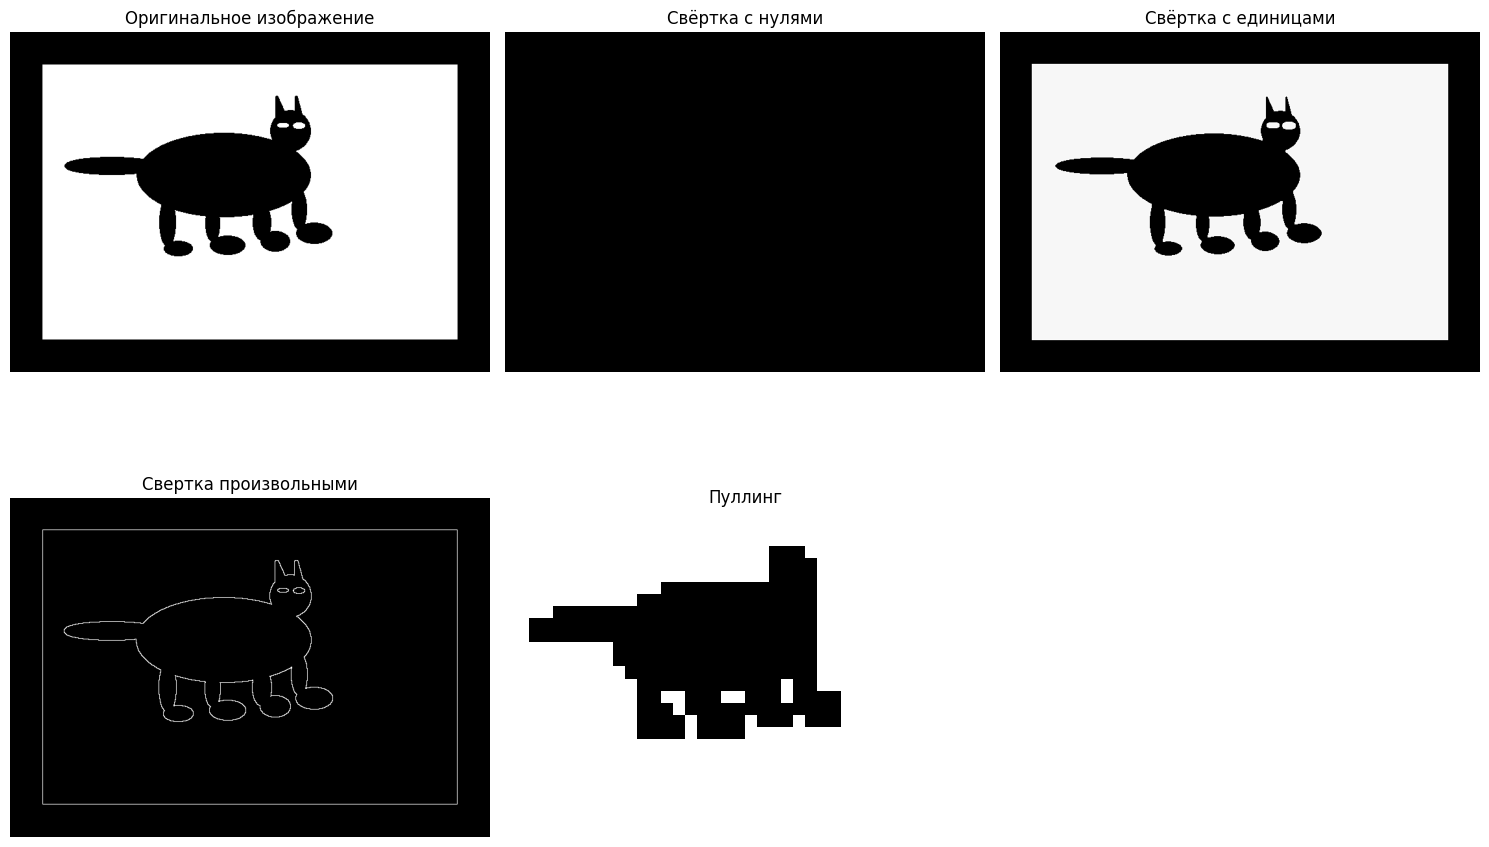

In [14]:
img = np.asarray(Image.open('cat.png'))
pad_img = np.pad(img, ((50, 50), (50, 50), (0, 0)), mode='constant', constant_values=0)

kernel_z = np.zeros((3, 3))
kernel_o = np.ones((3, 3))
kernel_r = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

# kernel_r = np.random.random((3, 3))
print(kernel_r)


def conv(image, kernel):

    height, width, channels = image.shape
    k_height, k_width = kernel.shape

    pad_h = k_height // 2
    pad_w = k_width // 2
    
    output = np.zeros_like(image)
    
    for i in range(pad_h, height - pad_h):
        for j in range(pad_w, width - pad_w):
            for c in range(channels):

                sum_val = 0
                for ki in range(k_height):
                    for kj in range(k_width):
                        sum_val += image[i + ki - pad_h, j + kj - pad_w, c] * kernel[ki, kj]
                output[i, j, c] = sum_val
    
    return output


def pool(image, kernel_size=2):

    height, width, channels = image.shape
    
    out_height = height // kernel_size
    out_width = width // kernel_size
    output = np.zeros((out_height, out_width, channels), dtype=image.dtype)

    for i in range(out_height):
        for j in range(out_width):
            for c in range(channels):

                block = image[i*kernel_size:(i+1)*kernel_size, j*kernel_size:(j+1)*kernel_size, c]

                output[i, j, c] = np.min(block)
    
    return output

res_z = conv(pad_img, kernel_z)
res_o = conv(pad_img, kernel_o)
res_r = conv(pad_img, kernel_r)
pooled_img = pool(img)
pooled_img = pool(pooled_img)
pooled_img = pool(pooled_img)
pooled_img = pool(pooled_img)

plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.title('Оригинальное изображение')
plt.imshow(pad_img)
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Свёртка с нулями')
plt.imshow(res_z.astype(np.uint8))
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Свёртка с единицами')
plt.imshow(res_o.astype(np.uint8))
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Свертка произвольными')
plt.imshow(res_r.astype(np.uint8))
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Пуллинг')
plt.imshow(pooled_img.astype(np.uint8))
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
train_dir = 'ai_labs\dat'
validation_dir = 'ai_labs\dat'
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')



inp = Input((150, 150, 3))
lay = Conv2D(32, (3, 3), activation='relu')(inp)
lay = Flatten()(lay)
lay = Dense(80, activation='relu')(lay)
lay = Dense(80, activation='relu')(lay)
lay = Dense(80, activation='relu')(lay)
lay = Dense(80, activation='relu')(lay)
lay = Dense(80, activation='relu')(lay)
lay = Dense(80, activation='relu')(lay)
out = Dense(1, activation='linear')(lay)
model = Model(inp, out)


model.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['acc'])
history = model.fit(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Found 4200 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.


c:\Users\gagilev_ae\Desktop\ai_part2\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - acc: 0.8013 - loss: 2.6556 - val_acc: 1.0000 - val_loss: 1.1921e-07
Epoch 2/30
 95/100 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - acc: 0.8374 - loss: 2.5925

KeyboardInterrupt: 

In [ ]:
import os
import shutil
import random


data_dir = 'C:\\Users\\gagilev_ae\\Desktop\\ai_part2\\ai_labs\\sem2\\data6'
tr_dir = 'tr'
val_dir = 'val'

tr_my_func = os.path.join(tr_dir, 'my_func')
tr_not_my_func = os.path.join(tr_dir, 'not_my_func')
val_my_func = os.path.join(val_dir, 'my_func')
val_not_my_func = os.path.join(val_dir, 'not_my_func')


os.makedirs(tr_my_func, exist_ok=True)
os.makedirs(tr_not_my_func, exist_ok=True)
os.makedirs(val_my_func, exist_ok=True)
os.makedirs(val_not_my_func, exist_ok=True)

for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)

    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    random.shuffle(files)

    train_files = files[:700]
    val_files = files[700:1000]

    if folder_name == '2':
        tr_target_dir = tr_my_func
        val_target_dir = val_my_func
    else:
        tr_target_dir = tr_not_my_func
        val_target_dir = val_not_my_func

    for filename in train_files:
        source = os.path.join(folder_path, filename)
        dest_name = f"{folder_name}_{filename}"
        destination = os.path.join(tr_target_dir, dest_name)
        shutil.copy2(source, destination)

    for filename in val_files:
        source = os.path.join(folder_path, filename)
        dest_name = f"{folder_name}_{filename}"
        destination = os.path.join(val_target_dir, dest_name)
        shutil.copy2(source, destination)

for directory in [tr_my_func, tr_not_my_func, val_my_func, val_not_my_func]:
    files_count = len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])
    print(f"{directory}: {files_count} файлов")

1\1.png
1\2.png
1\3.png
1\4.png
1\5.png
1\6.png
1\7.png
1\8.png
1\9.png
1\10.png
1\11.png
1\12.png
1\13.png
1\14.png
1\15.png
1\16.png
1\17.png
1\18.png
1\19.png
1\20.png
1\21.png
1\22.png
1\23.png
1\24.png
1\25.png
1\26.png
1\27.png
1\28.png
1\29.png
1\30.png
1\31.png
1\32.png
1\33.png
1\34.png
1\35.png
1\36.png
1\37.png
1\38.png
1\39.png
1\40.png
1\41.png
1\42.png
1\43.png
1\44.png
1\45.png
1\46.png
1\47.png
1\48.png
1\49.png
1\50.png
1\51.png
1\52.png
1\53.png
1\54.png
1\55.png
1\56.png
1\57.png
1\58.png
1\59.png
1\60.png
1\61.png
1\62.png
1\63.png
1\64.png
1\65.png
1\66.png
1\67.png
1\68.png
1\69.png
1\70.png
1\71.png
1\72.png
1\73.png
1\74.png
1\75.png
1\76.png
1\77.png
1\78.png
1\79.png
1\80.png
1\81.png
1\82.png
1\83.png
1\84.png
1\85.png
1\86.png
1\87.png
1\88.png
1\89.png
1\90.png
1\91.png
1\92.png
1\93.png
1\94.png
1\95.png
1\96.png
1\97.png
1\98.png
1\99.png
1\100.png
1\101.png
1\102.png
1\103.png
1\104.png
1\105.png
1\106.png
1\107.png
1\108.png
1\109.png
1\110.png
1\111.pn